API de calidad del aire: https://openaq.org/ 

## Cifras poboacionais de referencia
https://www.ige.gal/igebdt/igeapi/datos/9974 

## Unidades de medida de calidad del aire
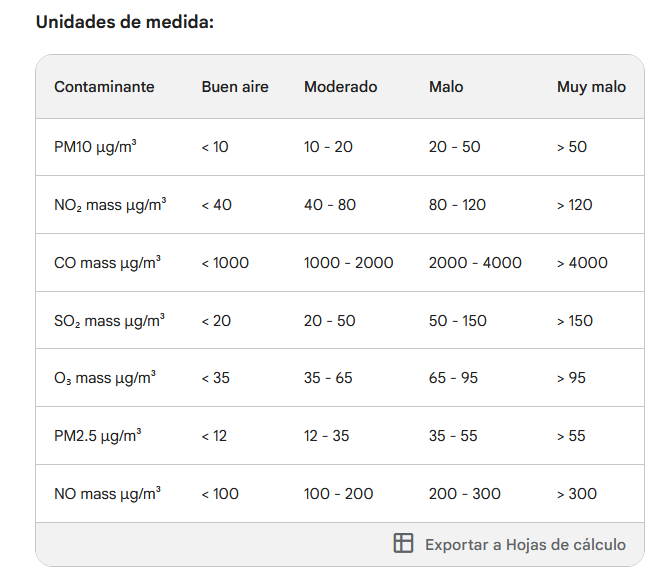

In [19]:
import requests
import pandas as pd

res = requests.get("https://api.openaq.org/v2/locations", headers={"X-API-Key": "9264bfb31e07de95718e90eb8ddcfc17593e677098491ff61ea06d2284eb6178"})

data = res.json()


df_air = pd.DataFrame(data['results'])
df_air.head()

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,coordinates,lastUpdated,firstUpdated,measurements,bounds,manufacturers
0,5490,Tasmania Region,Perth,None,AU,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 45522, 'a...",None,"{'latitude': -41.578, 'longitude': 147.172}",2024-04-18T13:54:11+00:00,2017-07-13T14:24:26+00:00,91049,"[147.172, -41.578, 147.172, -41.578]","[{'modelName': 'Government Monitor', 'manufact..."
1,5481,Tasmania Region,Longford,None,AU,None,False,None,"[{'id': 1, 'unit': 'µg/m³', 'count': 46289, 'a...",None,"{'latitude': -41.595, 'longitude': 147.122}",2024-04-18T13:54:07+00:00,2017-07-13T14:24:19+00:00,92576,"[147.122, -41.595, 147.122, -41.595]","[{'modelName': 'Government Monitor', 'manufact..."
2,5482,Tasmania Region,Emu River,None,AU,None,False,None,"[{'id': 1, 'unit': 'µg/m³', 'count': 2682, 'av...",None,"{'latitude': -41.108, 'longitude': 145.883}",2024-04-18T13:54:07+00:00,2022-10-03T18:14:07+00:00,5364,"[145.883, -41.108, 145.883, -41.108]","[{'modelName': 'Government Monitor', 'manufact..."
3,5483,Tasmania Region,Westbury,None,AU,None,False,None,"[{'id': 1, 'unit': 'µg/m³', 'count': 45768, 'a...",None,"{'latitude': -41.53, 'longitude': 146.835}",2024-04-18T13:54:07+00:00,2017-07-13T14:24:18+00:00,91537,"[146.835, -41.53, 146.835, -41.53]","[{'modelName': 'Government Monitor', 'manufact..."
4,5484,Tasmania Region,Hadspen,None,AU,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 46786, 'a...",None,"{'latitude': -41.503, 'longitude': 147.067}",2024-04-18T13:54:07+00:00,2017-07-13T14:24:17+00:00,93574,"[147.067, -41.503, 147.067, -41.503]","[{'modelName': 'Government Monitor', 'manufact..."


In [20]:
url = "https://api.openaq.org/v2/sources?order_by=sourceName"

headers = {"X-API-Key": "9264bfb31e07de95718e90eb8ddcfc17593e677098491ff61ea06d2284eb6178"}

response = requests.get(url, headers=headers)

print(response.text)

{"meta":{"name":"openaq-api","license":"","website":"api.openaq.org","page":1,"limit":100,"found":0},"results":[]}


In [21]:
fichero = "openaq_location_2162250_measurments.csv"

df_noia = pd.read_csv(fichero)

df_noia

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2162250,NOIA,no2,0.41,µg/m³,2024-04-09T22:00:00+00:00,2024-04-10T00:00:00+02:00,Europe/Madrid,42.720806,-8.923472,NaN,NaN,NaN,Unknown Governmental Organization,EEA
1,2162250,NOIA,no2,0.40,µg/m³,2024-04-09T23:00:00+00:00,2024-04-10T01:00:00+02:00,Europe/Madrid,42.720806,-8.923472,NaN,NaN,NaN,Unknown Governmental Organization,EEA
2,2162250,NOIA,no2,0.78,µg/m³,2024-04-10T00:00:00+00:00,2024-04-10T02:00:00+02:00,Europe/Madrid,42.720806,-8.923472,NaN,NaN,NaN,Unknown Governmental Organization,EEA


In [22]:
url = "https://api.openaq.org/v2/countries?limit=100&offset=0&sort=asc&order_by=name"

headers = {
    "accept": "application/json",
    "content-type": "application/json"
}

response = requests.get(url, headers=headers)

data = response.json()

df = pd.DataFrame(data['results'])
df[df['name'] == 'Spain']

,code,name,locations,firstUpdated,lastUpdated,parameters,count,cities,sources
94,ES,Spain,735,2016-11-17 23:00:00+00,2024-04-17 19:29:00+00,"[co, humidity, no, no2, nox, o3, pm1, pm10, pm...",42958450,349,7


### Cities of Spain

In [23]:
url = "https://api.openaq.org/v2/cities?limit=100&page=1&offset=0&sort=asc&country=ES&order_by=city"


headers = {
    "accept": "application/json",
}

response = requests.get(url, headers=headers)

data = response.json()

data['results']

[{'country': 'ES',
  'city': 'ABANTO Y CIÉRVANA/ABANTO ZIERBENA',
  'count': 10347,
  'locations': 2,
  'firstUpdated': '2024-01-28 23:00:00+00',
  'lastUpdated': '2024-04-17 18:00:00+00',
  'parameters': ['no2', 'o3', 'pm10', 'so2']},
 {'country': 'ES',
  'city': 'A Coruña',
  'count': 924408,
  'locations': 15,
  'firstUpdated': '2016-11-17 23:00:00+00',
  'lastUpdated': '2024-01-29 20:00:00+00',
  'parameters': ['co', 'no', 'no2', 'o3', 'pm10', 'pm25', 'so2']},
 {'country': 'ES',
  'city': 'Agullana',
  'count': 28216,
  'locations': 1,
  'firstUpdated': '2016-11-17 23:00:00+00',
  'lastUpdated': '2024-04-17 18:00:00+00',
  'parameters': ['o3']},
 {'country': 'ES',
  'city': 'AIA',
  'count': 120522,
  'locations': 1,
  'firstUpdated': '2016-11-17 23:00:00+00',
  'lastUpdated': '2024-04-17 18:00:00+00',
  'parameters': ['co', 'no', 'no2', 'o3', 'pm10', 'pm25']},
 {'country': 'ES',
  'city': 'ALAGÓN',
  'count': 105835,
  'locations': 1,
  'firstUpdated': '2016-11-17 23:00:00+00',
  

### Get locations by city

In [24]:
url = "https://api.openaq.org/v2/locations?limit=100&page=1&offset=0&sort=desc&radius=1000&city=A%20Coru%C3%B1a&order_by=lastUpdated&dump_raw=false"

headers = {
    "accept": "application/json",
}

response = requests.get(url, headers=headers)

data = response.json()

df_coruna = pd.DataFrame(data['results'])

df_coruna

#Emisiones de vehículos, tasas de enfermedades respiratorias, densidad de población

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,coordinates,lastUpdated,firstUpdated,measurements,bounds,manufacturers
0,2920,A Coruña,ES1867A,None,ES,None,False,None,"[{'id': 1, 'unit': 'µg/m³', 'count': 22064, 'a...",None,"{'latitude': 43.48055554946381, 'longitude': -...",2024-01-29T20:00:00+00:00,2016-11-18T00:00:00+00:00,137952,"[-8.24138888, 43.48055554946381, -8.24138888, ...","[{'modelName': 'Government Monitor', 'manufact..."
1,4032,A Coruña,ES0005R,None,ES,None,False,None,"[{'id': 5, 'unit': 'µg/m³', 'count': 27346, 'a...",None,"{'latitude': 42.720559999464705, 'longitude': ...",2024-01-29T20:00:00+00:00,2016-11-17T23:00:00+00:00,87820,"[-8.92361, 42.720559999464705, -8.92361, 42.72...","[{'modelName': 'Government Monitor', 'manufact..."
2,4345,A Coruña,ES1138A,None,ES,None,False,None,"[{'id': 19843, 'unit': 'µg/m³', 'count': 5428,...",None,"{'latitude': 43.367777769464, 'longitude': -8....",2024-01-29T20:00:00+00:00,2016-11-18T00:00:00+00:00,122944,"[-8.418888879999999, 43.367777769464, -8.41888...","[{'modelName': 'Government Monitor', 'manufact..."
3,4349,A Coruña,ES1901A,None,ES,None,False,None,"[{'id': 3, 'unit': 'µg/m³', 'count': 5595, 'av...",None,"{'latitude': 42.8877777694645, 'longitude': -8...",2024-01-29T20:00:00+00:00,2023-05-06T01:00:00+00:00,38556,"[-8.53083333, 42.8877777694645, -8.53083333, 4...","[{'modelName': 'Government Monitor', 'manufact..."
4,4351,A Coruña,ES1868A,None,ES,None,False,None,"[{'id': 6, 'unit': 'µg/m³', 'count': 26319, 'a...",None,"{'latitude': 42.875833329464506, 'longitude': ...",2024-01-29T20:00:00+00:00,2016-11-18T00:00:00+00:00,163307,"[-8.55916666, 42.875833329464506, -8.55916666,...","[{'modelName': 'Government Monitor', 'manufact..."
5,221945,A Coruña,ES1958A,None,ES,None,False,None,"[{'id': 19843, 'unit': 'µg/m³', 'count': 5166,...",None,"{'latitude': 43.4452777694639, 'longitude': -7...",2024-01-29T20:00:00+00:00,2021-03-07T01:00:00+00:00,27088,"[-7.91805555, 43.4452777694639, -7.91805555, 4...","[{'modelName': 'Government Monitor', 'manufact..."
6,221949,A Coruña,ES0201A,None,ES,None,False,None,"[{'id': 4, 'unit': 'µg/m³', 'count': 10530, 'a...",None,"{'latitude': 43.4499999994639, 'longitude': -7...",2024-01-29T20:00:00+00:00,2021-03-07T01:00:00+00:00,69481,"[-7.84722222, 43.4499999994639, -7.84722222, 4...","[{'modelName': 'Government Monitor', 'manufact..."
7,221962,A Coruña,ES2050A,None,ES,None,False,None,"[{'id': 6, 'unit': 'µg/m³', 'count': 10848, 'a...",None,"{'latitude': 43.2237999994641, 'longitude': -8...",2024-01-29T20:00:00+00:00,2021-03-07T01:00:00+00:00,27232,"[-8.26111, 43.2237999994641, -8.26111, 43.2237...","[{'modelName': 'Government Monitor', 'manufact..."
8,221967,A Coruña,ES1960A,None,ES,None,False,None,"[{'id': 19843, 'unit': 'µg/m³', 'count': 5266,...",None,"{'latitude': 43.4927777694638, 'longitude': -8...",2024-01-29T20:00:00+00:00,2021-03-07T01:00:00+00:00,49432,"[-8.25027777, 43.4927777694638, -8.25027777, 4...","[{'modelName': 'Government Monitor', 'manufact..."
9,221970,A Coruña,ES0094A,None,ES,None,False,None,"[{'id': 19843, 'unit': 'µg/m³', 'count': 5195,...",None,"{'latitude': 43.40555554946389, 'longitude': -...",2024-01-29T20:00:00+00:00,2021-03-07T01:00:00+00:00,70929,"[-7.98888888, 43.40555554946389, -7.98888888, ...","[{'modelName': 'Government Monitor', 'manufact..."


### Get measurements by location ID

In [25]:
url = "https://api.openaq.org/v2/measurements?date_from=2024-03-10T00%3A00%3A00Z&date_to=2024-03-17T21%3A53%3A00Z&limit=100&page=1&offset=0&sort=desc&radius=1000&location_id=2920&order_by=datetime"

headers = {
    "accept": "application/json",
}

response = requests.get(url, headers=headers)

data = response.json()

data

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 100,
  'found': 0},
 'results': []}

### Consigue valores dunha fecha a outra e dunha localización específica ordenado por datetime

In [36]:
import json

url = "https://api.openaq.org/v2/measurements?date_from=2002-01-01%2000%3A00%3A00&date_to=2023-01-01%2000%3A00%3A00&limit=10000&page=1&offset=0&sort=desc&location=ES1867A&order_by=datetime"


headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

data = response.json()

# data['results']

save_file = open("prueba_data.json", "w")  
json.dump(data['results'], save_file, indent = 6)  
save_file.close()  



In [ ]:
# https://docs.openaq.org/reference/measurements_get_v2_measurements_get

In [28]:
# import re
# url = "https://www.ige.gal/igebdt/igeapi/datos/9974"

# response = requests.get(url)

# # Separar por línea aparte
# filas = response.text.split("\n")
# # Separar por comas
# filas = list(map(lambda fila: fila.split(","), filas))
# # Reemplazar las '"' por nada
# filas = list(map(lambda fila: list(map(lambda elemento: elemento.replace('"', ''), fila)), filas))

# columnas = filas[0]
# filas = filas[1:10]

# df = pd.DataFrame(filas, columns=columnas)

# df